In [37]:
import random
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [38]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    counter: int
    result: str

In [39]:
def welcome_node(state: AgentState) -> AgentState:
    state["counter"] = 0
    state["result"] = f"Welcome {state['name']}"
    return state

In [40]:
def random_node(state: AgentState) -> AgentState:
    state["numbers"].append(random.randint(0,10))
    state["counter"] += 1
    return state

In [41]:
def should_continue(state: AgentState) -> str:
    if state["counter"] < 5:
        return "loop"
    else:
        return "exit"

In [42]:
graph = StateGraph(AgentState)
graph.add_node("welcome", welcome_node)
graph.add_node("random", random_node)

graph.add_edge(START, "welcome")
graph.add_edge("welcome", "random")
graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

agent = graph.compile()

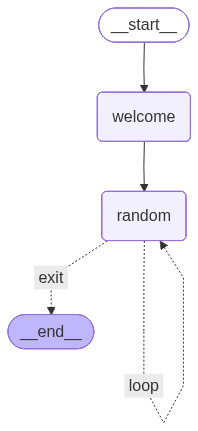

In [43]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [44]:
final_state = agent.invoke({"name": "ali", "numbers": []})

In [45]:
print(final_state)

{'name': 'ali', 'numbers': [1, 0, 0, 5, 9], 'counter': 5, 'result': 'Welcome ali'}
